# 分析 final_solutions.csv ，通过代码作图，显示三维 Pareto Front

**独立代码块**

In [ ]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = np.loadtxt("final_solutions.csv", delimiter=",")

# data.shape = (N, 15)
# 假设前 12 列是决策变量 X，后 3 列是目标值 F。
X = data[:, :12]   # (N, 12)
F = data[:, 12:]   # (N, 3)

# 这里假设 F 里的三列已经是我们要画的数值(若需反转/还原，请在此之前做)
f0 = F[:, 0]
f1 = F[:, 1]
f2 = F[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(f0, f1, f2, c='b', marker='o')

ax.set_xlabel("Objective 1 (f0)")
ax.set_ylabel("Objective 2 (f1)")
ax.set_zlabel("Objective 3 (f2)")
plt.title("Pareto Front in 3D")

plt.show()


# 读取 res_history 文件，分析代际间适应度优化的趋势
**独立代码块**

**以单目标为例: 逐代计算最小值、平均值**

final_X.shape: (4, 12)
final_F.shape: (4, 3)
历代数量 =  3


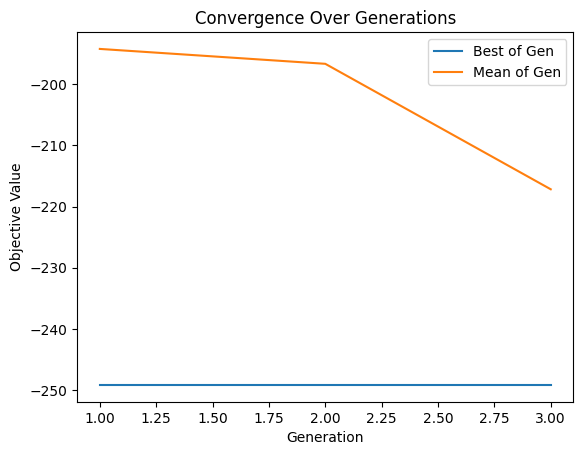

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("res_history.npz", allow_pickle=True)
final_X = data["final_X"]  # (n_nd, n_var), 最终非支配解/最优解
final_F = data["final_F"]  # (n_nd, n_obj)
history_F = data["history_F"]  # (n_gen,) 个元素, 每个元素 shape=(pop_size, n_obj)

# 打印信息:
print("final_X.shape:", final_X.shape)
print("final_F.shape:", final_F.shape)
print("历代数量 = ", len(history_F))

# 以单目标为例: 逐代计算最小值、平均值
best_per_gen = []
avg_per_gen = []
for gen_idx, F_gen in enumerate(history_F):
    best_val = np.min(F_gen[:, 0])   # 第0列目标, shape=(pop_size,)
    avg_val  = np.mean(F_gen[:, 0])
    best_per_gen.append(best_val)
    avg_per_gen.append(avg_val)

# 绘制
gen_axis = np.arange(1, len(history_F)+1)
plt.figure()
plt.plot(gen_axis, best_per_gen, label="Best of Gen")
plt.plot(gen_axis, avg_per_gen, label="Mean of Gen")
plt.xlabel("Generation")
plt.ylabel("Objective Value")
plt.title("Convergence Over Generations")
plt.legend()
plt.show()


['final_X', 'final_F', 'history_F']


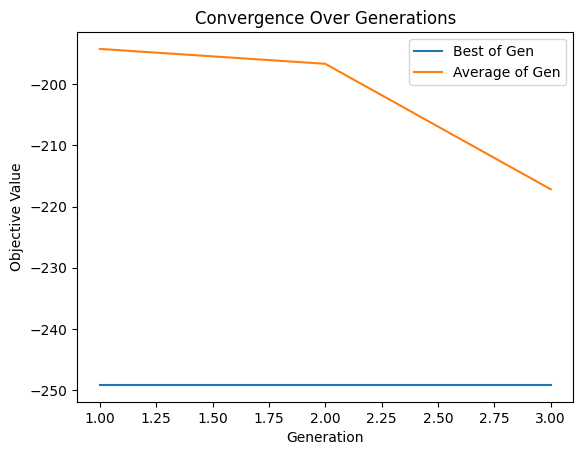

In [3]:
# 加载存储的文件
data = np.load("res_history.npz", allow_pickle=True)
print(data.files)  # ['final_X', 'final_F', 'history_F']

final_X = data["final_X"]
final_F = data["final_F"]
history_F = data["history_F"]  # 这是一个 list，每一项是每代的 F

# 可以计算并绘制最优解、平均解的变化
import matplotlib.pyplot as plt
best_per_gen = []
avg_per_gen = []

for F_gen in history_F:
    best_per_gen.append(np.min(F_gen[:, 0]))  # 单目标最小值
    avg_per_gen.append(np.mean(F_gen[:, 0]))  # 单目标平均值

# 绘制收敛图
plt.figure()
plt.plot(range(1, len(history_F)+1), best_per_gen, label="Best of Gen")
plt.plot(range(1, len(history_F)+1), avg_per_gen, label="Average of Gen")
plt.xlabel("Generation")
plt.ylabel("Objective Value")
plt.title("Convergence Over Generations")
plt.legend()
plt.show()
